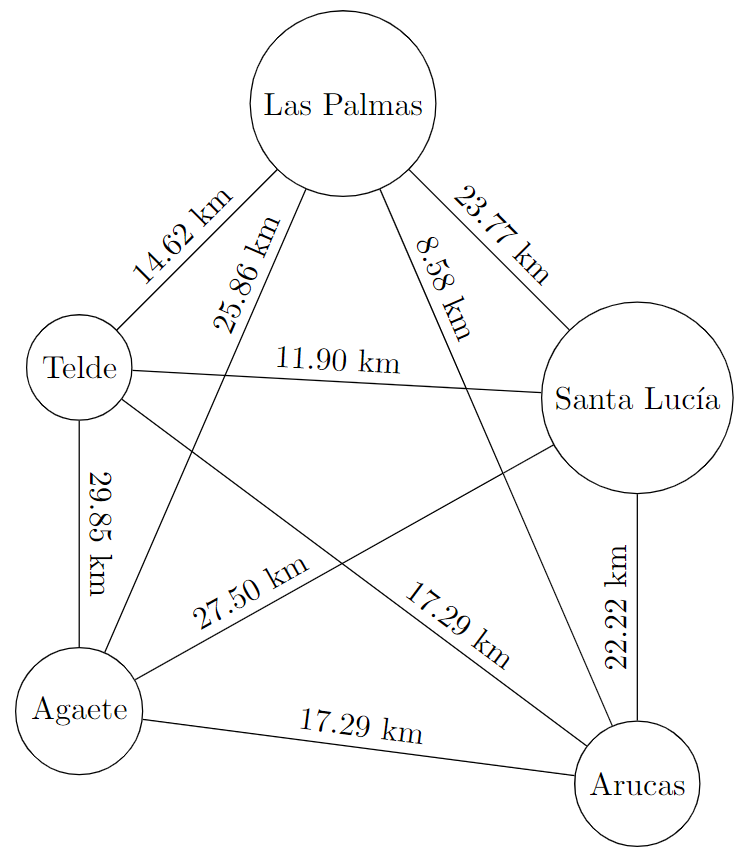


In [18]:
import random
from geopy.distance import geodesic

# Definir las ciudades de Gran Canaria
ciudades = {
    'Las Palmas': (28.1235, -15.4363),
    'Telde': (27.9924, -15.4196),
    'Santa Lucía de Tirajana': (27.9184, -15.5072),
    'Agaete': (28.0997, -15.6981),
    'Arucas': (28.1184, -15.5234),
    # Agrega más ciudades si lo deseas
}

# Función para calcular la distancia entre dos ciudades en kilómetros
def calcular_distancia(ciudad1, ciudad2):
    coord1 = ciudades[ciudad1]
    coord2 = ciudades[ciudad2]
    distancia = geodesic(coord1, coord2).kilometers
    return distancia

# Función para calcular la distancia total del recorrido
def calcular_distancia_total(recorrido):
    distancia_total = 0
    for i in range(len(recorrido) - 1):
        distancia_total += calcular_distancia(recorrido[i], recorrido[i + 1])
    distancia_total += calcular_distancia(recorrido[-1], recorrido[0])  # Volver al punto de inicio
    return distancia_total


In [19]:
# Función para generar una población inicial aleatoria
def generar_poblacion_inicial(ciudades):
    poblacion = [list(ciudades.keys()) for _ in range(100)]
    for individuo in poblacion:
        random.shuffle(individuo)
    return poblacion

# Función para seleccionar padres mediante torneo
def seleccionar_padres(poblacion, k=5):
    torneo = random.choices(poblacion, k=k)
    torneo.sort(key=lambda x: calcular_distancia_total(x))
    return torneo[0]

# Función para realizar el cruce de dos padres
def cruzar(padre1, padre2):
    punto_corte = random.randint(0, len(padre1) - 1)
    hijo = padre1[:punto_corte]
    for ciudad in padre2:
        if ciudad not in hijo:
            hijo.append(ciudad)
    return hijo

# Función para aplicar mutación a un individuo
def mutar(individuo):
    idx1, idx2 = random.sample(range(len(individuo)), 2)
    individuo[idx1], individuo[idx2] = individuo[idx2], individuo[idx1]

# Función principal del algoritmo evolutivo
def algoritmo_evolutivo(ciudades, generaciones):
    poblacion = generar_poblacion_inicial(ciudades)
    nueva_poblacion = [];

    for _ in range(generaciones):

        for _ in range(len(poblacion) // 2):
            padre1 = seleccionar_padres(poblacion)
            padre2 = seleccionar_padres(poblacion)
            hijo = cruzar(padre1, padre2)

            if random.random() < 0.1:
                mutar(hijo)
            if(nueva_poblacion.__contains__(hijo) == False):
                nueva_poblacion.append(hijo)
        
        if len(nueva_poblacion) <= 1:
             break
        
        poblacion = nueva_poblacion
        nueva_poblacion = []


    if poblacion:
        mejor_recorrido = min(poblacion, key=calcular_distancia_total)
        mejor_distancia = calcular_distancia_total(mejor_recorrido)

        return poblacion, mejor_recorrido, mejor_distancia
    else:
        return [], float('inf')  # Devolver solución vacía con distancia infinita



In [20]:
# Ejecutar el algoritmo con 100 generaciones
poblacion_final, mejor_recorrido, mejor_distancia = algoritmo_evolutivo(ciudades, 100)

print(f"Población final: {poblacion_final}")
print(f"Mejor recorrido: {mejor_recorrido}")
print(f"Distancia total: {mejor_distancia:.2f} km")

Población final: [['Las Palmas', 'Arucas', 'Agaete', 'Santa Lucía de Tirajana', 'Telde'], ['Las Palmas', 'Arucas', 'Agaete', 'Telde', 'Santa Lucía de Tirajana']]
Mejor recorrido: ['Las Palmas', 'Arucas', 'Agaete', 'Santa Lucía de Tirajana', 'Telde']
Distancia total: 79.89 km


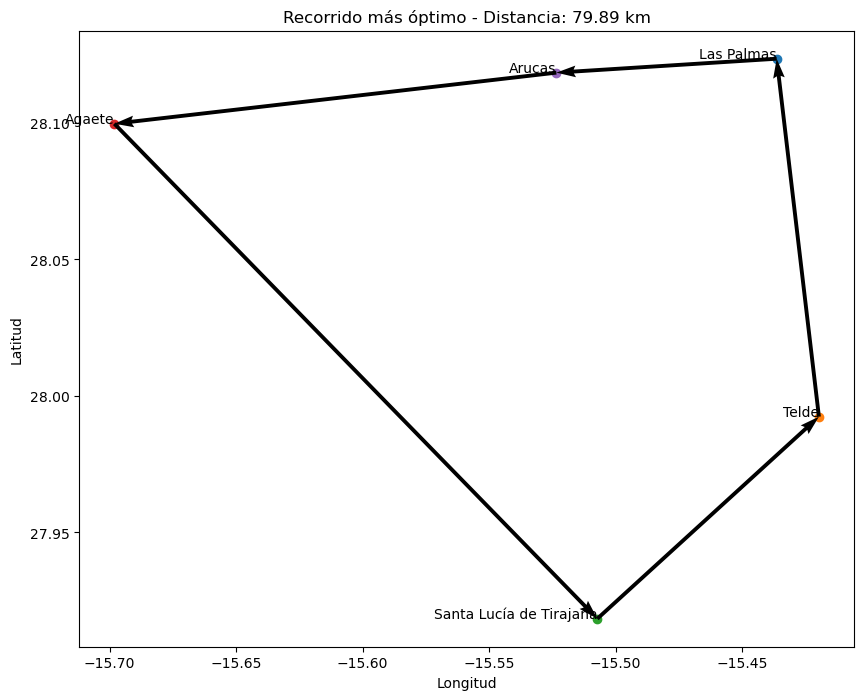

In [29]:
import itertools
import matplotlib.pyplot as plt

# Coordenadas de las ciudades
ciudades = {
    'Las Palmas': (28.1235, -15.4363),
    'Telde': (27.9924, -15.4196),
    'Santa Lucía de Tirajana': (27.9184, -15.5072),
    'Agaete': (28.0997, -15.6981),
    'Arucas': (28.1184, -15.5234),
}

# Dibujar el recorrido en el mapa
coordenadas_ruta = [ciudades[ciudad] for ciudad in mejor_recorrido]
latitudes, longitudes = zip(*coordenadas_ruta)

fig, ax = plt.subplots(figsize=(10, 8))

# Dibujar ciudades
for ciudad, coords in ciudades.items():
    plt.scatter(coords[1], coords[0])
    plt.text(coords[1], coords[0], ciudad, ha='right')

# Conectar ciudades con flechas
for i in range(len(mejor_recorrido) - 1):
    plt.annotate('', xy=ciudades[mejor_recorrido[i+1]], xytext=ciudades[mejor_recorrido[i]],
                 arrowprops=dict(facecolor='black', shrink=0.05))
    ax.quiver(longitudes[i], latitudes[i], longitudes[i + 1] - longitudes[i], latitudes[i + 1] - latitudes[i],
               angles='xy', scale_units='xy', scale=1, color='black', width=0.005)

# Dibujar vector desde el último punto hasta el primero
plt.quiver(longitudes[-1], latitudes[-1], longitudes[0] - longitudes[-1], latitudes[0] - latitudes[-1],
           angles='xy', scale_units='xy', scale=1, color='black', width=0.005)

plt.title(f"Recorrido más óptimo - Distancia: {mejor_distancia:.2f} km")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(False)
plt.show()